# Bit-slicing

## Imports

In [43]:
import numpy as np
import math
import cv2
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
import os
from tqdm import tqdm
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"

## Support functions

In [34]:
def plot_image(img, title=None):
    plt.figure(figsize = (16,16))
    if title:
        plt.title(title, fontsize=20)
    plt.imshow(img, cmap='gray')

## Loading of data

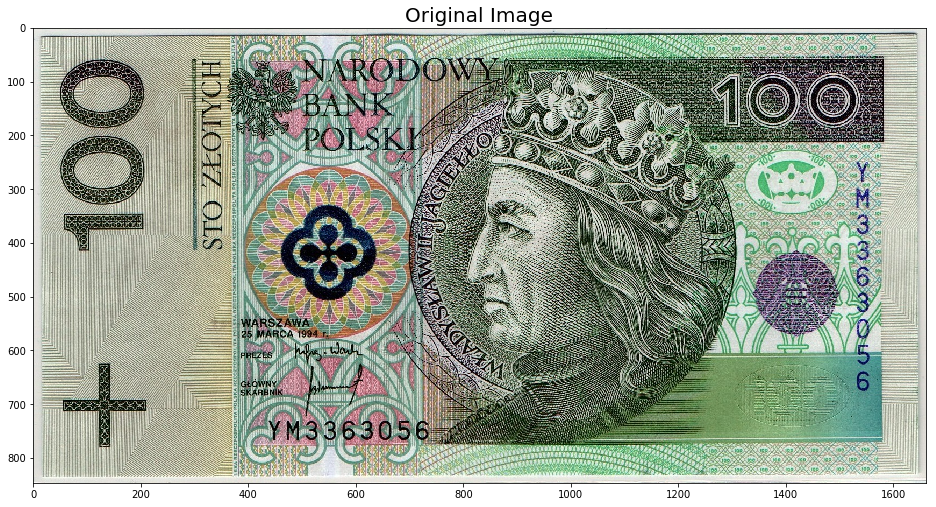

In [35]:
img_name = "100zloty.jpg"
img_path = os.path.join(SOURCE_DIR, img_name)
img = cv2.imread(img_path)
plot_image(img, 'Original Image')

## Image processing

In [44]:
# reload a colourless photo
img = cv2.imread(img_path, 0)

x, y = img.shape[:2]

array_of_binary = []

for i in range(8):
    array_of_binary.append(np.zeros([x, y], dtype=np.uint8))

for i in tqdm(range(0, x)):
    for j in range(0, y):
        bits = img[i, j]
        counter = 128
        sum = 0
        for k in range(8):
            result = bits & counter
            if result.all() == counter:
                sum += result
            array_of_binary[k][i, j] = result
            counter = counter >> 1

100%|██████████| 847/847 [01:33<00:00,  9.66it/s]


In [46]:
tmp_img = cv2.add(array_of_binary[6], array_of_binary[7])
tmp_img_2 = cv2.add(array_of_binary[4], array_of_binary[5])
newImage = cv2.add(tmp_img, tmp_img_2)
newImage_2 = cv2.add(array_of_binary[3], newImage)
newImage_3 = cv2.add(array_of_binary[2], newImage_2)
newImage_4 = cv2.add(array_of_binary[1], newImage_3)
newImage_5 = cv2.add(array_of_binary[0], newImage_4)

## Let's have a look

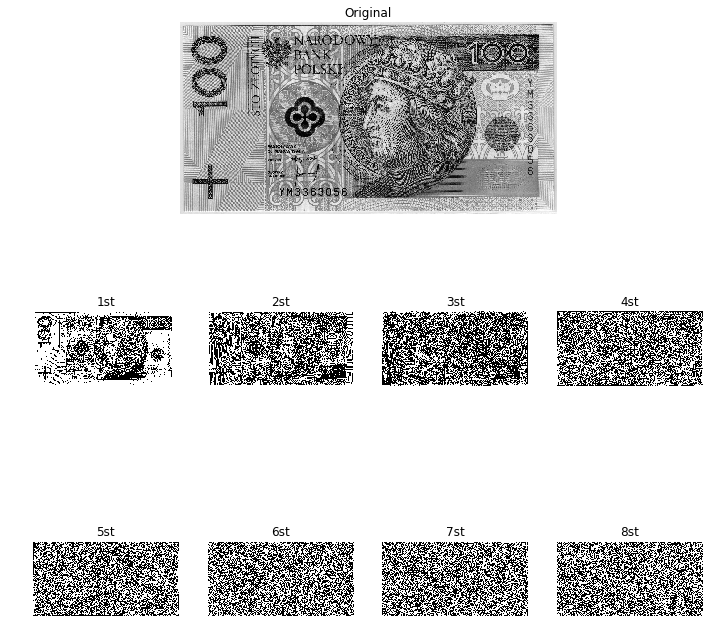

In [47]:
gs = gridspec.GridSpec(3, 4)
plt.figure(figsize=(12,12))
plt.subplot(gs[0, :])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')

plt.subplot(gs[0, :])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')

for i in range(8):
    if i < 4:
        plt.subplot(gs[1, i])
        plt.imshow(array_of_binary[i], cmap='gray')
        plt.axis('off')
        plt.title(str(i+1) + 'st')
    else:
        plt.subplot(gs[2, (i - 4)])
        plt.imshow(array_of_binary[i], cmap='gray')
        plt.axis('off')
        plt.title(str(i+1) + 'st')

plt.show()

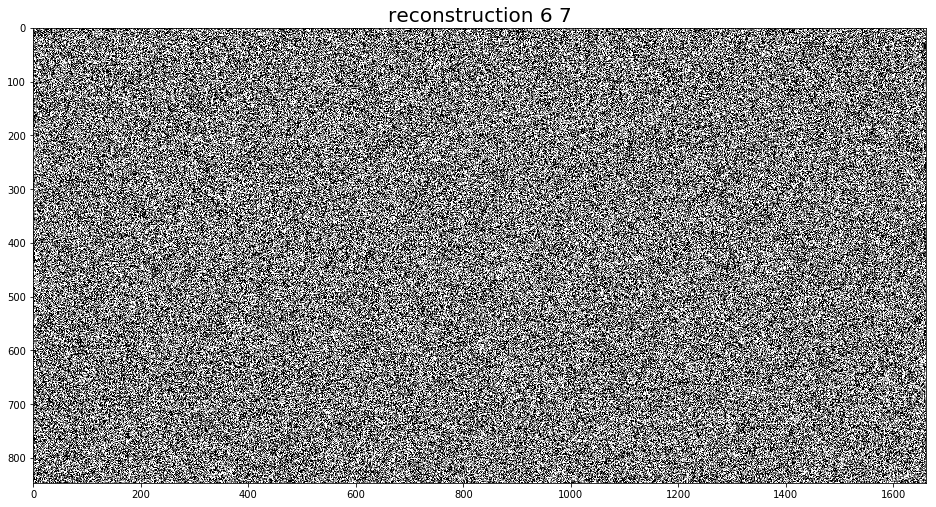

In [48]:
plot_image(tmp_img, 'reconstruction 6 7')

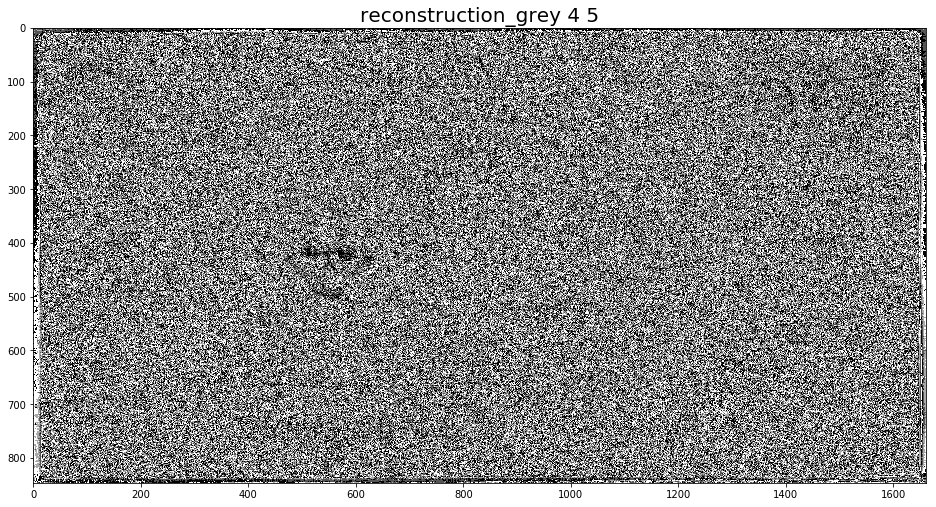

In [49]:
plot_image(tmp_img_2, 'reconstruction_grey 4 5')

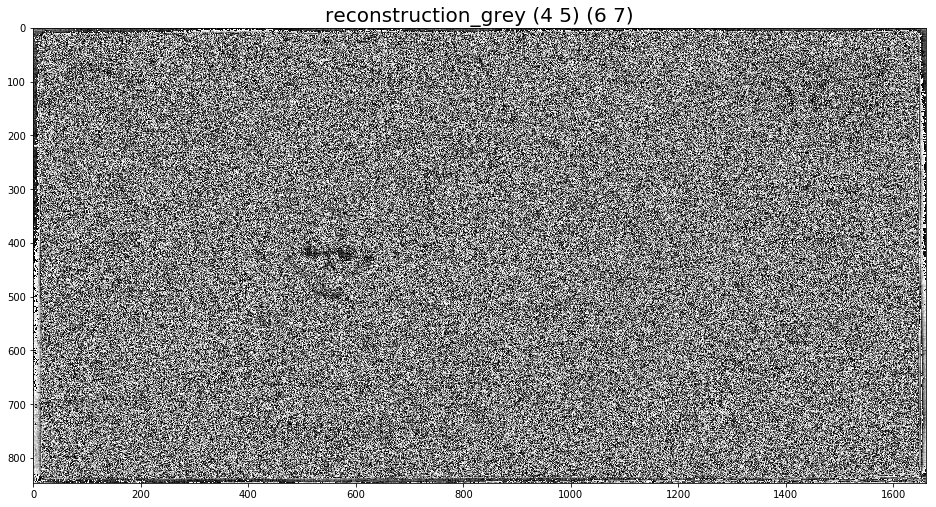

In [50]:
plot_image(newImage, 'reconstruction_grey (4 5) (6 7)')

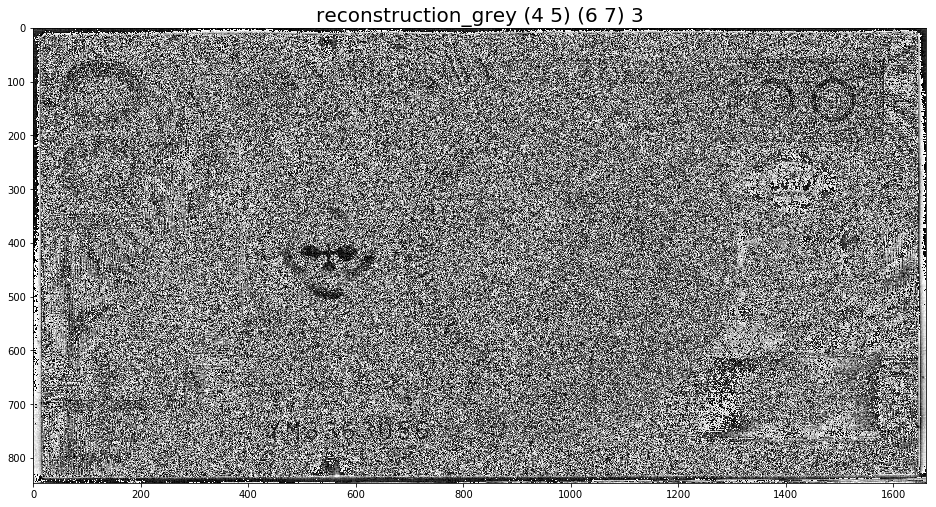

In [51]:
plot_image(newImage_2, 'reconstruction_grey (4 5) (6 7) 3')

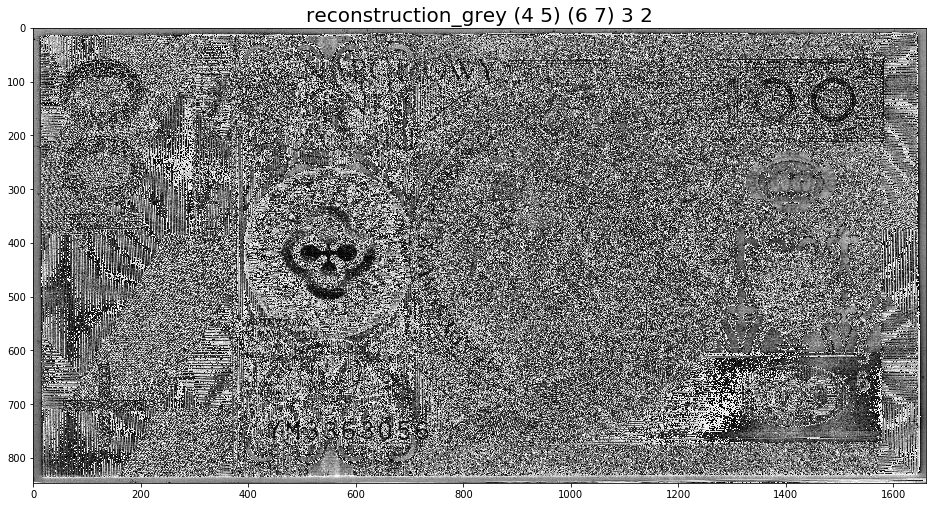

In [52]:
plot_image(newImage_3, 'reconstruction_grey (4 5) (6 7) 3 2')

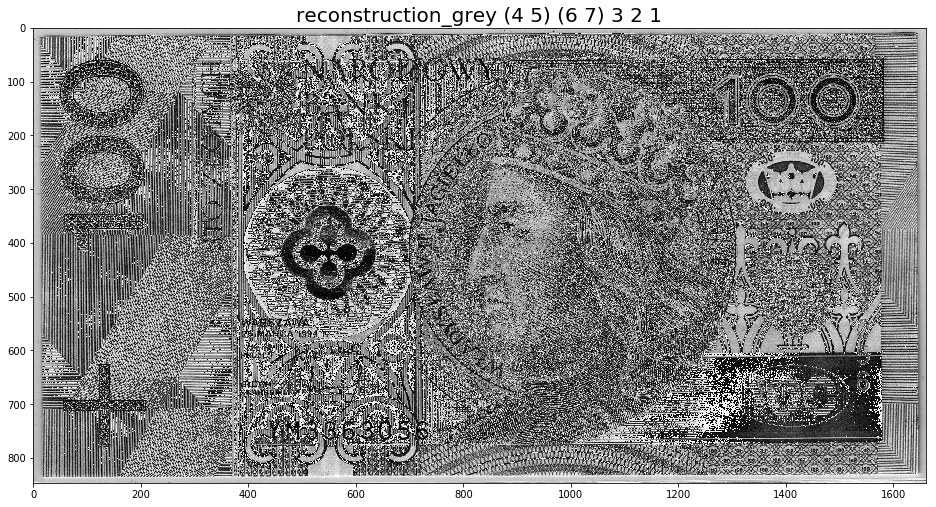

In [41]:
plot_image(newImage_4, 'reconstruction_grey (4 5) (6 7) 3 2 1')

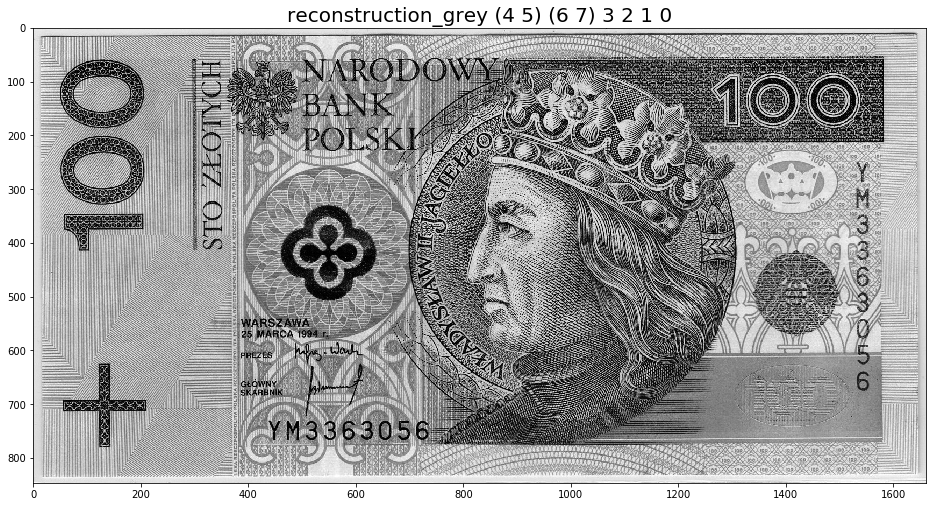

In [42]:
plot_image(newImage_5, 'reconstruction_grey (4 5) (6 7) 3 2 1 0')